In [1]:
import torch
import numpy as np
import toydiff as tdf
import matplotlib.pyplot as plt

------

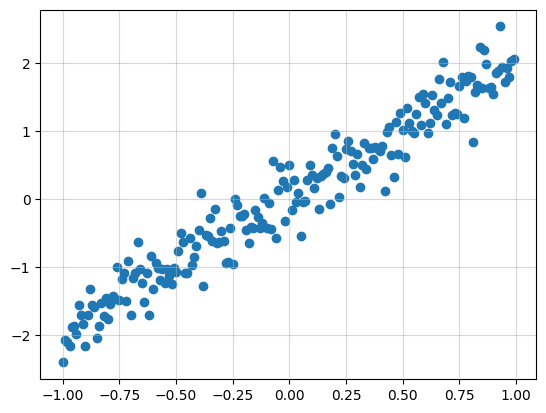

In [2]:
x = np.arange(-1, 1, 0.01).reshape(-1,1)
y = 2 * x + np.random.normal(size=(len(x), 1), scale=0.3)

fig, ax = plt.subplots(1,1)
ax.scatter(x, y)
ax.grid(True, alpha=0.5);

In [3]:
model = tdf.nn.blocks.Linear(1, 1, bias=True)

In [4]:
feat = tdf.Tensor(x, track_gradient=True)
labels = tdf.Tensor(y, track_gradient=True)

In [5]:
from toydiff.nn.optim import SGD
from toydiff.nn.functional import mse_loss

In [6]:
optimizer = SGD(model)

In [7]:
# original prediction
y_0 = model(feat).numpy().copy()

In [8]:
for name, param in model.named_parameters():
    print(name, param)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
# we want to minimize the sum of squares
losses = []
for i in range(15_000):
    optimizer.zero_grad()

    out = model(feat)
    loss = mse_loss(out, labels)
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.value)

In [ ]:
for name, param in model.named_parameters():
    print(name, param)

In [ ]:
fig, ax = plt.subplots(1,1)

ax.plot(losses)
ax.grid(True, alpha=0.5)
ax.set_title("Loss");

In [ ]:
fig, ax = plt.subplots(1,1)

ax.scatter(x, y)
ax.scatter(x, y_0)
ax.scatter(x, out.numpy())

ax.grid(True, alpha=0.5)
ax.legend(["Data", "Prediction (before training)", "Prediction (after training)"])
ax.set_title("Data vs Prediction");

In [ ]:
from toydiff.nn.blocks import Module, Linear

In [ ]:
class Model(Module):
    def __init__(self, in_f, out_f):
        super().__init__()
        self.lin1 = Linear(in_f, 5)
        self.lin2 = Linear(5, 5)
        self.lin3 = Linear(5, out_f)

    def forward(self, X):
        return self.lin3(self.lin2(self.lin1(X)))

In [ ]:
mo = Model(1,1)

In [ ]:
for p in mo.parameters():
    print(p)

In [ ]:
for p in mo.named_parameters():
    print(p)

----